In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
X1 = np.random.multivariate_normal ([3 , 2] , [[1 , 2] , [2 , 1]] , size = 200)
X2 = np.random.multivariate_normal ([7 , 9] , [[1 , 3] , [3 , 1]] , size = 200)
print(X1.shape)
print(X2.shape)

(200, 2)
(200, 2)


C:\Users\prach\AppData\Local\Temp/ipykernel_10328/3188486816.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal ([3 , 2] , [[1 , 2] , [2 , 1]] , size = 200)
C:\Users\prach\AppData\Local\Temp/ipykernel_10328/3188486816.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal ([7 , 9] , [[1 , 3] , [3 , 1]] , size = 200)


In [3]:
y1 = np.ones((200 ,))
y2 = np.zeros((200,))
print(y1.shape)
print(y2.shape)

(200,)
(200,)


In [4]:
x = np.concatenate([X1 , X2] , axis = 0)
y = np.concatenate([y1 , y2] , axis = 0)

print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [5]:

ix = np.arange(0 , len(x))
print(ix)
np.random.shuffle(ix)
print(ix)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [6]:
x = x[ix]
y = y[ix]

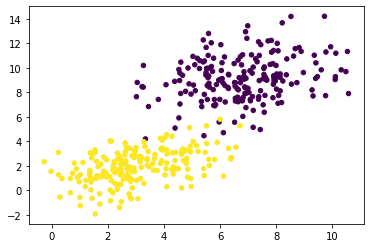

In [7]:
plt.scatter(x[:,0] , x[:,1] , c = y , s = 20)

In [8]:
class LogisticRegression :
    
    def predict (self , X) :
        if self.w.shape[0] != X.shape[1] :
            X = X.copy()
            ones_column = np.ones((len(X) , 1))
            X = np.concatenate([ones_column , X] , axis = 1)
        return self.sigmoid(X.dot(self.w)) 
    
    def sigmoid (self , z) :
        return 1 / (1 + np.e ** (-z))
    
    def sumOfResidual (self , y , y_hat):
        return (y - y_hat).sum()
    
    def __get_gradient(self , X , y, y_hat) :
        grad = []
        for j in range(X.shape[1]) :
            g = -2 * ((y - y_hat).reshape(-1,) * X[:,j]).sum() 
            grad.append(g)
        return np.array(grad).reshape(-1,1)
            
    
    def __gradient_descent(self , X , y , epochs , learning_rate , batch_size) :
        idx = np.arange(0 , len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        itr = len(X) // batch_size
        
        lossList = []
        for i in range(epochs) :
            for j in range(itr) :
                X_batch , y_batch = X[j * batch_size :(j+1) * batch_size] , y[j * batch_size : (j + 1) * batch_size]
                y_hat_batch = self.predict(X_batch)
                grad = self.__get_gradient(X_batch , y_batch, y_hat_batch)
                self.w = self.w - learning_rate * grad
             
            yhat = self.predict(X)
            loss = self.loss(y , yhat)
            lossList.append(loss)
            acc = self.accuracy(y , yhat)
            sor = self.sumOfResidual(y , yhat)
            print(f"{i + 1}/{epochs}  Loss : {loss} accuracy : {acc}  sor : {sor} ")
            
        return lossList
    
    def loss(self ,ytrue , ypred) :
        return -(ytrue * np.log(ypred + 1e-7) + (1 - ytrue) * np.log(1 - ypred + 1e-7)).sum()
    
    def accuracy (self , ytrue , ypred) :
        return (ytrue == (ypred > 0.5).astype('int')).mean()
    
    def fit(self , X , y, epochs = 1000 , learning_rate = 0.01 , method = 'batch', **kwargs) :
        print(type(epochs))
        X = X.copy()
        ones_column = np.ones((len(X) , 1))
        X = np.concatenate([ones_column , X], axis = 1)
        print(X.shape)
        
        self.w = np.random.rand(X.shape[1] , 1) 
        
        if method == 'batch' :
            batch_size = X.shape[0]
        elif method == 'mini-batch' :
            if kwargs.get('batch_size') == None :
                batch_size = int(X.shape[0] * 0.25)
            else :
                batch_size = kwargs['batch_size']
        elif method == 'stochastic' :
            batch_size = 1
            
        return self.__gradient_descent(X , y ,epochs, learning_rate , batch_size)    

In [9]:
logr = LogisticRegression()
losses = logr.fit(x , y.reshape(-1 , 1) , epochs = 300 , learning_rate = 0.01 , method = 'batch')

<class 'int'>
(400, 3)
1/300  Loss : 3157.850899960841 accuracy : 0.5075  sor : 196.99983866354108 
2/300  Loss : 3080.53924231917 accuracy : 0.515  sor : 193.89388835396795 
3/300  Loss : 2827.719868983995 accuracy : 0.545  sor : 182.51199561933615 
4/300  Loss : 366.7681456616676 accuracy : 0.875  sor : 12.669947366742662 
5/300  Loss : 442.39484240396234 accuracy : 0.8625  sor : 48.82961734209902 
6/300  Loss : 1035.979304644347 accuracy : 0.7525  sor : -79.72537833957807 
7/300  Loss : 2861.5244908214886 accuracy : 0.545  sor : 182.4033093007917 
8/300  Loss : 661.3940874860382 accuracy : 0.8275  sor : 69.50745335129375 
9/300  Loss : 1225.2631851675978 accuracy : 0.7325  sor : -88.50430390851459 
10/300  Loss : 2802.1123229592263 accuracy : 0.55  sor : 180.24404132253412 
11/300  Loss : 787.6387949729336 accuracy : 0.7975  sor : 79.11371273915299 
12/300  Loss : 994.9429620005453 accuracy : 0.76  sor : -74.17473459238752 
13/300  Loss : 2518.8851585007883 accuracy : 0.5725  sor : 

C:\Users\prach\AppData\Local\Temp/ipykernel_10328/1231995383.py:11: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.e ** (-z))


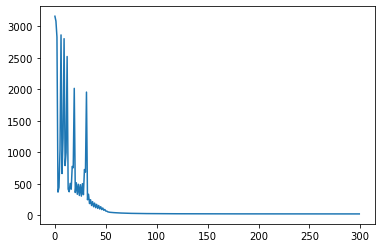

In [10]:
plt.plot(losses)
plt.show()

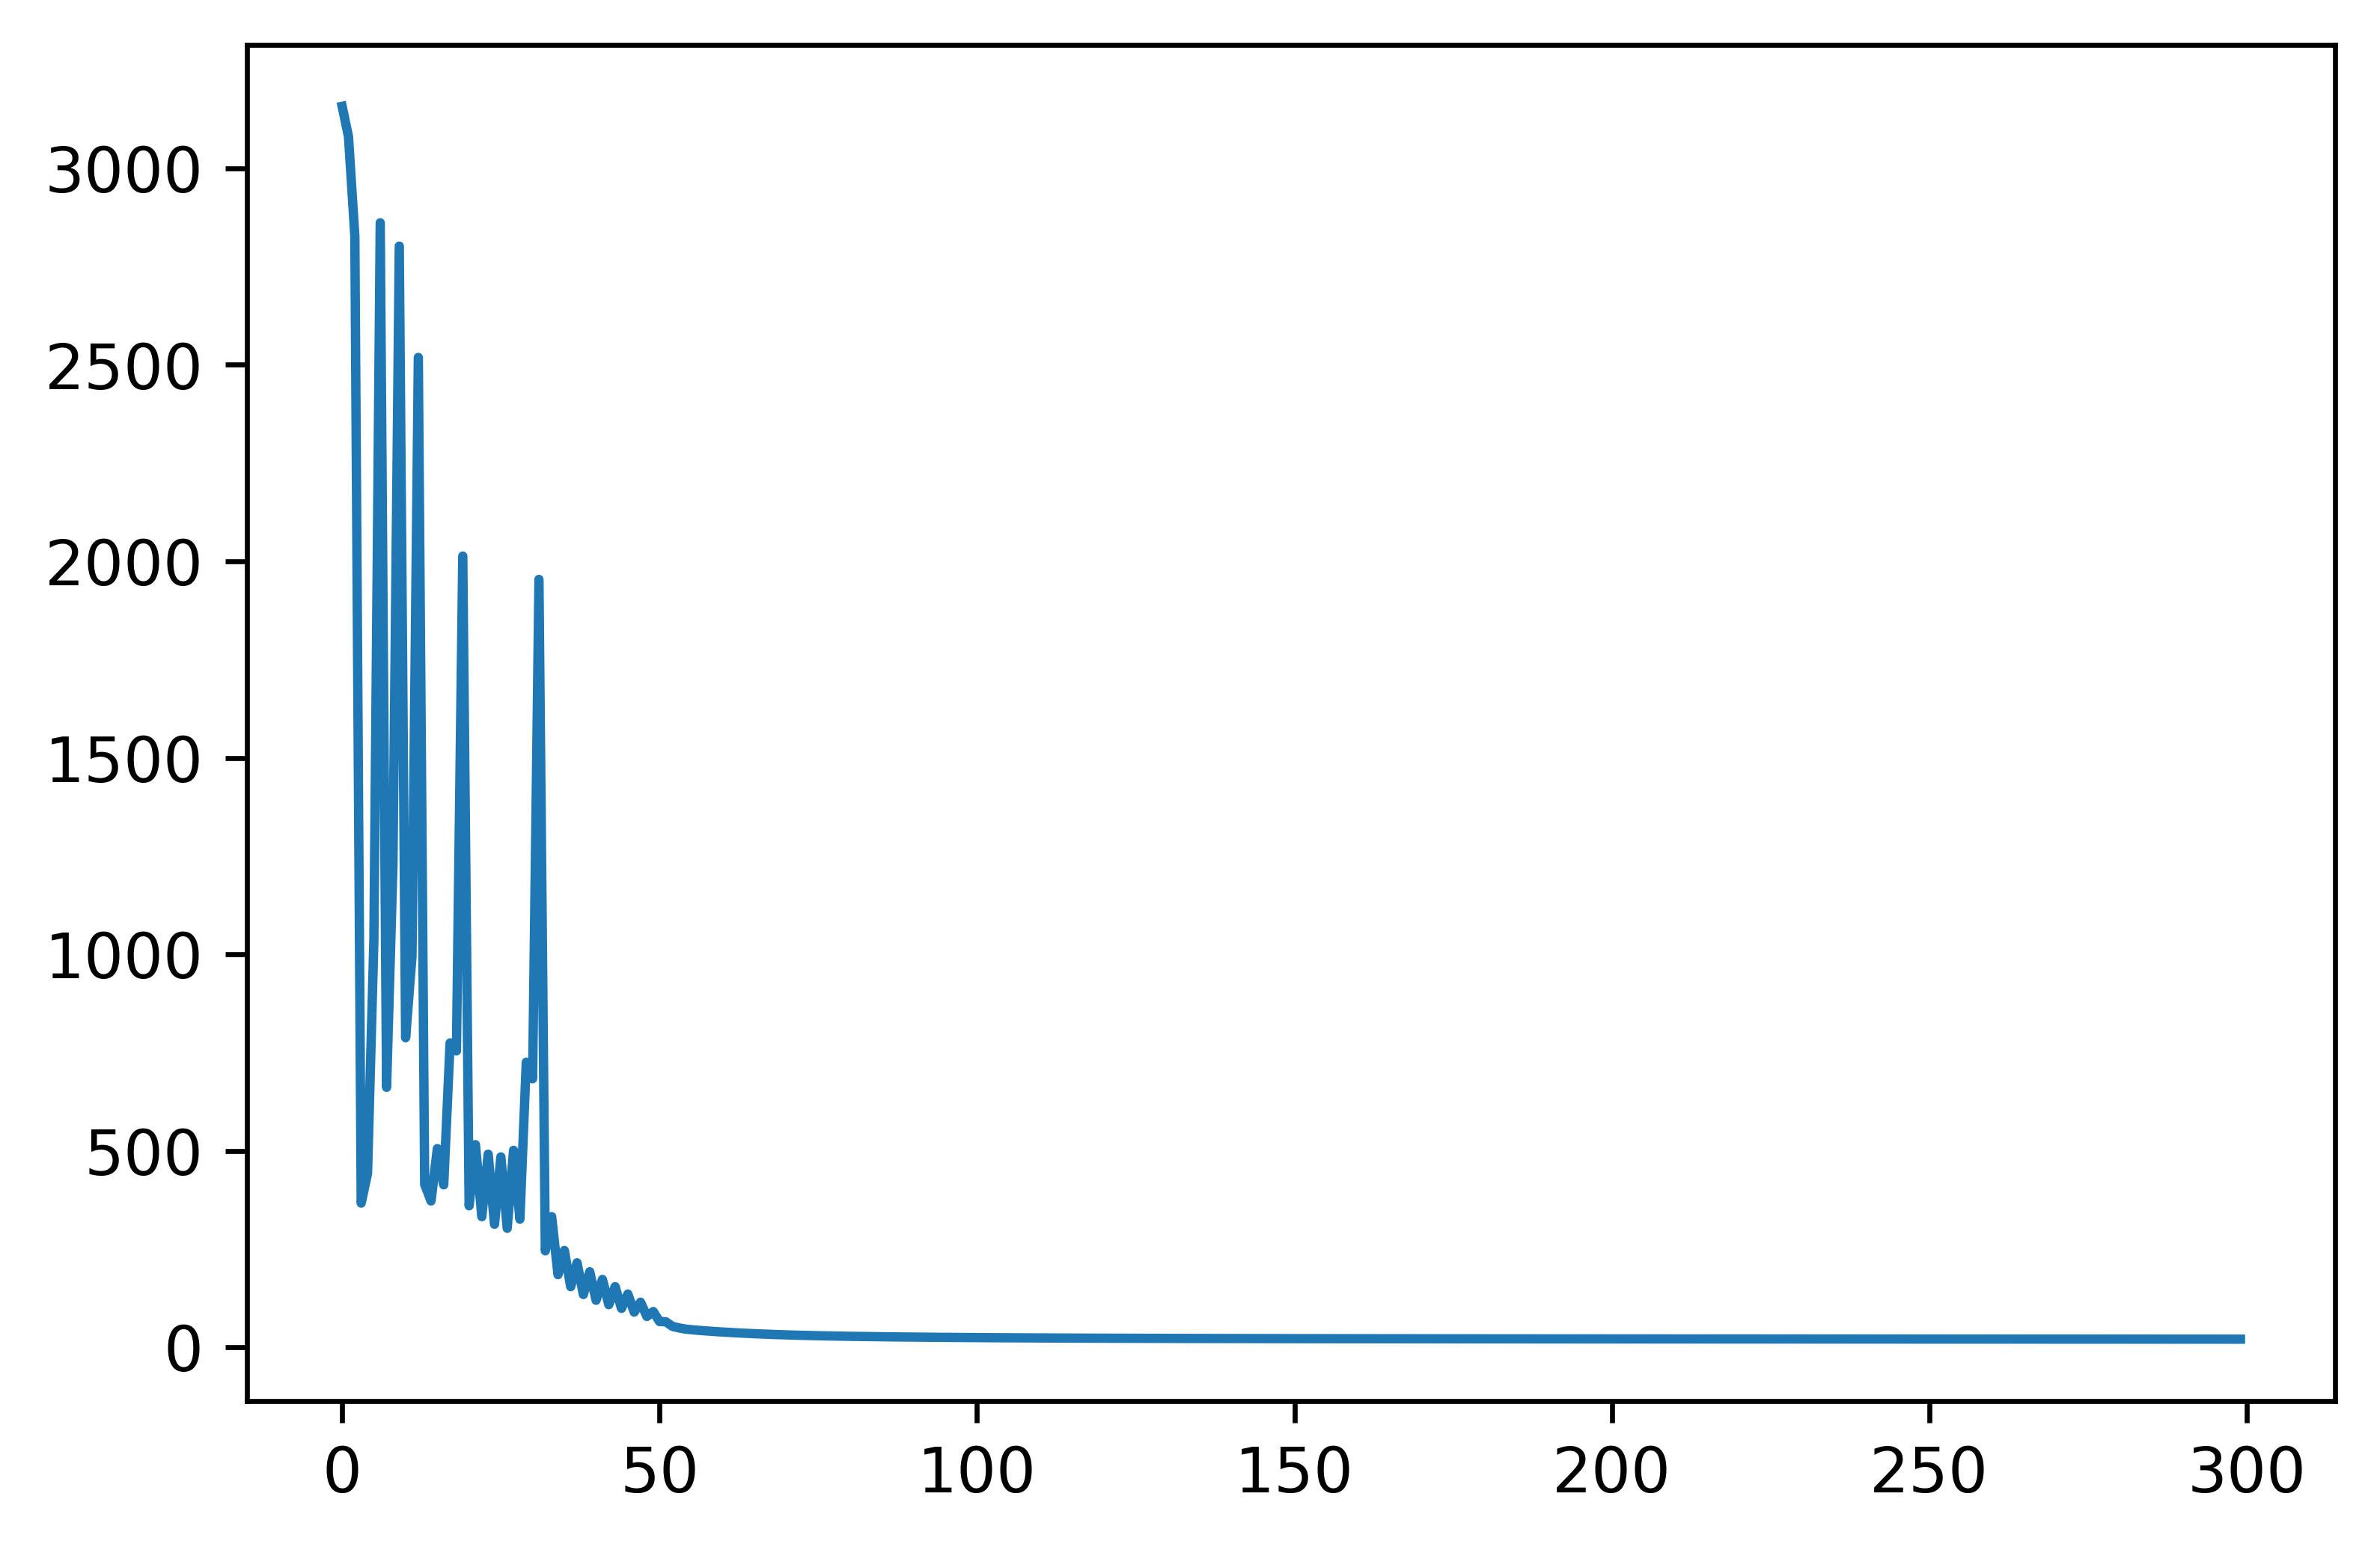

In [11]:
plt.figure(dpi = 600)
plt.plot(losses)
plt.show()

In [12]:
logr.w

array([[29.47048266],
       [-0.633143  ],
       [-5.18121036]])

In [13]:
ypred = logr.predict(x)
print(ypred)

[[8.71609317e-05]
 [9.96211997e-01]
 [4.82820499e-06]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.45533834e-11]
 [1.00000000e+00]
 [1.25210262e-07]
 [1.00000000e+00]
 [9.26361006e-13]
 [9.99998998e-01]
 [1.72799961e-10]
 [1.00000000e+00]
 [9.99999972e-01]
 [9.96336240e-01]
 [1.23825566e-08]
 [9.99990065e-01]
 [1.57185589e-09]
 [3.58372738e-09]
 [1.92638027e-07]
 [9.99999998e-01]
 [2.25824836e-09]
 [1.01508396e-12]
 [9.99996914e-01]
 [8.20658764e-14]
 [1.62887197e-17]
 [9.99993715e-01]
 [1.00000000e+00]
 [7.92055268e-09]
 [2.56038664e-06]
 [1.10937534e-01]
 [2.15042470e-14]
 [9.99999880e-01]
 [9.99999990e-01]
 [6.39348891e-16]
 [9.99999999e-01]
 [2.14417547e-03]
 [1.21067028e-10]
 [3.65469228e-17]
 [2.32492118e-14]
 [5.06597331e-08]
 [1.33324652e-08]
 [2.12616820e-11]
 [9.99921650e-01]
 [1.28288920e-16]
 [9.99999433e-01]
 [1.60447294e-11]
 [9.97940601e-01]
 [4.57895662e-05]
 [6.10040965e-09]
 [1.81686342e-11]
 [1.43587031e-09]
 [1.00000000e+00]
 [8.22891487e-10]
 [9.99308215e-01]
 [9.999999

In [14]:
logr.accuracy(y.reshape(-1,1) , ypred)

0.98

In [15]:
f1 = np.linspace(x[:,0].min() , x[:,0].max() , 50)
f2 = np.linspace(x[:,1].min() , x[:,1].max() , 50)

f1 , f2 = np.meshgrid(f1 , f2)
f1 , f2 = f1.reshape(-1 , 1) , f2.reshape(-1 , 1)
print(f1.shape , f2.shape)

x_ = np.concatenate([f1 , f2] , axis = 1)
print(x_.shape)

(2500, 1) (2500, 1)
(2500, 2)


In [16]:
def Z(X , w) :
    if w.shape[0] != X.shape[1] :
        X = X.copy()
        ones_column = np.ones((len(X) , 1))
        X = np.concatenate([ones_column , X] , axis = 1)
    return X.dot(w)

In [20]:
z = Z(x_ , logr.w)
print(z.shape)

(2500, 1)


In [22]:
%matplotlib qt
plt.figure(figsize = (6 , 6))
ax = plt.axes(projection = '3d')
ax.scatter(x[:,0] , x[:,1] , c = y , label = "Training Data")
ax.scatter(f1 , f2 ,z, c = z , cmap = plt.cm.coolwarm , alpha = 0.5 , label = "Z")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Z = (X.W)")
plt.legend()
plt.show()

In [23]:
sigma = 1 / (1 + np.e ** -z)
print(sigma.shape)

(2500, 1)


In [26]:
%matplotlib qt
plt.figure(figsize = (6 , 6))
ax = plt.axes(projection = '3d')
ax.scatter(x[:,0] , x[:,1] , c = y , label = "Training Data")
# ax.scatter(f1 , f2 ,z, c = z , cmap = plt.cm.coolwarm , s = 5, alpha = 0.5 , label = "Z")
ax.scatter(f1 , f2 ,sigma, c = sigma , cmap = plt.cm.coolwarm , s = 5, alpha = 0.5 , label = "sigmoid(Z)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Z = (X.W)")
plt.legend()
plt.show()

## Visualize Loss 